# RFTP1

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
base_folder = '/content/drive/MyDrive/RFTPs/RFTP1/data/'
nvg='milky-way-nvg.jpg'
color='milky-way.jpg'
mcat='Mr-Cat.jpg'
wl = 'Wheel-of-colors.jpg'
wl2 = 'Wheel-of-colors2.jpg'

# Plotting the images

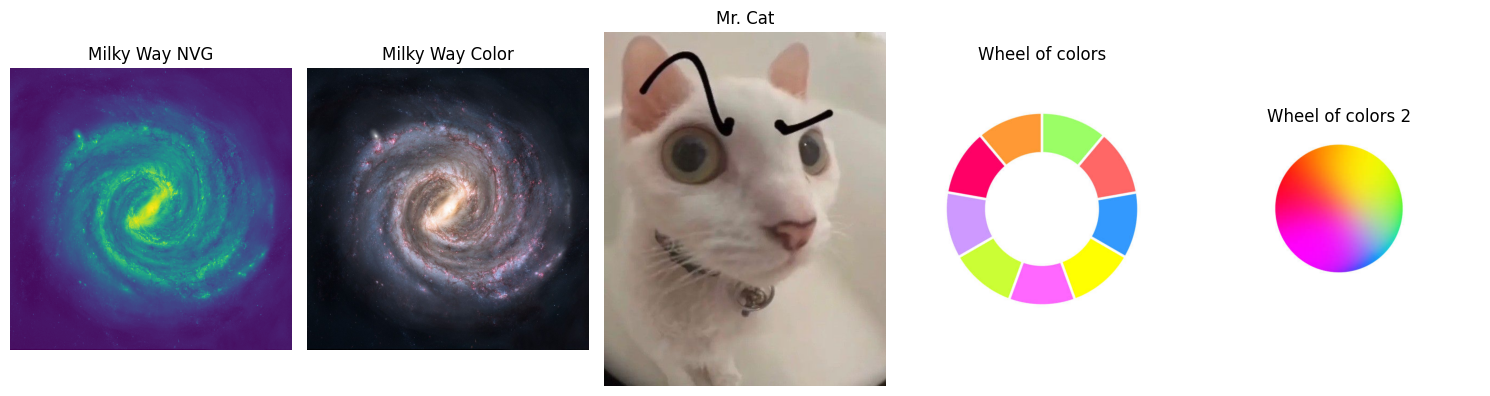

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import os

image1 = os.path.join(base_folder,nvg)
mwnvg = io.imread(image1)

image2 = os.path.join(base_folder,color)
mwclr = io.imread(image2)

image3 = os.path.join(base_folder,mcat)
cat = io.imread(image3)

image4 = os.path.join(base_folder,wl)
wheel = io.imread(image4)

image4 = os.path.join(base_folder,wl2)
wheel2 = io.imread(image4)
# Create a figure with 3 subplots arranged horizontally
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Adjust figsize as needed

# Display each image in a separate subplot
axes[0].imshow(mwnvg)
axes[0].axis('off')
axes[0].set_title('Milky Way NVG')

axes[1].imshow(mwclr)
axes[1].axis('off')
axes[1].set_title('Milky Way Color')

axes[2].imshow(cat)
axes[2].axis('off')
axes[2].set_title('Mr. Cat')

axes[3].imshow(wheel)
axes[3].axis('off')
axes[3].set_title('Wheel of colors')

axes[4].imshow(wheel2)
axes[4].axis('off')
axes[4].set_title('Wheel of colors 2')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#Implementing the fuzzy C-means algo unoptimized takes a much longer time while executing

In [77]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Initialize membership matrix
def initialize_membership(n_data, n_clusters):
    return np.random.dirichlet(np.ones(n_clusters), size=n_data)

# Update cluster centers
def update_centers(U, data, m):
    um = U ** m
    centers = np.dot(um.T, data) / np.sum(um, axis=0)[:, np.newaxis]
    return centers

# Update membership matrix
def update_membership(U, centers, data, m, epsilon=1e-10):
    n_data = data.shape[0]
    n_clusters = centers.shape[0]


    for i in range(n_data):
        for j in range(n_clusters):
            denominator = np.sum([(np.linalg.norm(data[i] - centers[j]) / (np.linalg.norm(data[i] - centers[k]) + epsilon)) ** (2 / (m - 1)) for k in range(n_clusters)])
            #print(denominator)
            if denominator == 0:
                U[i, j] = 0.0
            else:
             U[i, j] = 1.0 / (denominator + epsilon)


    return U

# Fuzzy C-means algorithm
def fuzzy_c_means(data, n_clusters=2, m=2, max_iter=3, error=1e-5):
    n_data = data.shape[0]
    U = initialize_membership(n_data, n_clusters)

    for _ in range(max_iter):
        print('Iteration #',_ + 1)
        centers = update_centers(U, data, m)
        U_new = update_membership(U.copy(), centers, data, m)

        if np.linalg.norm(U_new - U) < error: # The error value (error parameter) represents the threshold for the change in membership values
            break                             # that triggers the convergence criterion. A smaller error value leads to stricter convergence,
                                              # requiring smaller changes in membership values for the algorithm to stop, which is more precise.

    return centers, U

# Apply Fuzzy C-means to grayscale image
def apply_fcm_to_image(image_path, n_clusters=2, m=2):
    img = cv2.imread(image_path, 0)  # Load grayscale image
    data = img.reshape(-1, 1)

    # Apply FCM
    centers, U = fuzzy_c_means(data, n_clusters, m)

    # Create a segmented image
    segmented_img = np.argmax(U, axis=1).reshape(img.shape)

    # Create a heatmap to visualize fuzzy membership
    plt.imshow(segmented_img, cmap='gray')
    plt.title(f'Fuzzy C-means Segmentation with {n_clusters} Clusters')
    plt.show()

# Apply FCM to Color Image
def apply_fcm_to_color_image(image_path, n_clusters=6, m=2):
    img = cv2.imread(image_path)
    data = img.reshape(-1, 3)

    # Apply FCM
    centers, U = fuzzy_c_means(data, n_clusters, m)

    # Create a segmented image
    segmented_img = np.argmax(U, axis=1).reshape(img.shape[:2])

    # Create a heatmap to visualize fuzzy membership
    plt.imshow(segmented_img, cmap='viridis')
    plt.title(f'Fuzzy C-means Segmentation with {n_clusters} Clusters (Color)')
    plt.show()

# Example usage:
print(base_folder+nvg)
apply_fcm_to_image(base_folder+nvg)
print(base_folder+color)
apply_fcm_to_color_image(base_folder+color)

/content/drive/MyDrive/RFTPs/RFTP1/data/milky-way-nvg.jpg
Iteration # 1


KeyboardInterrupt: 

##Code Optimized with the Numpy Vectorization


Convergence reached after 38 iterations.


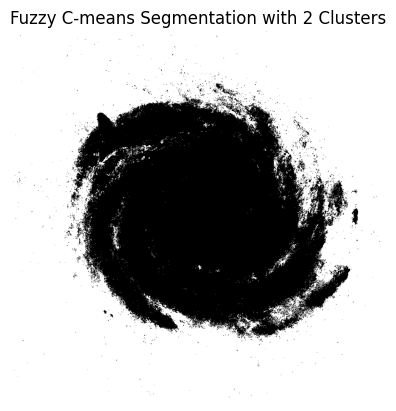

milky-way-nvg.jpg segmented with:  2  clusters.

Convergence reached after 322 iterations.


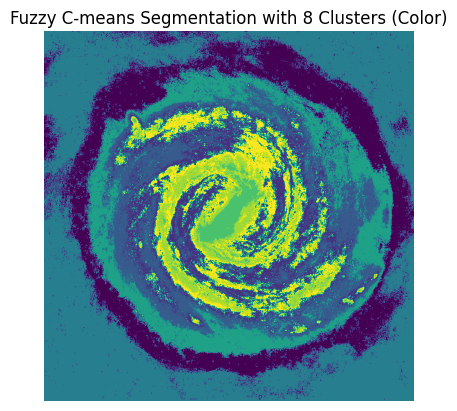

milky-way.jpg segmented with:  8  clusters.

Convergence reached after 162 iterations.


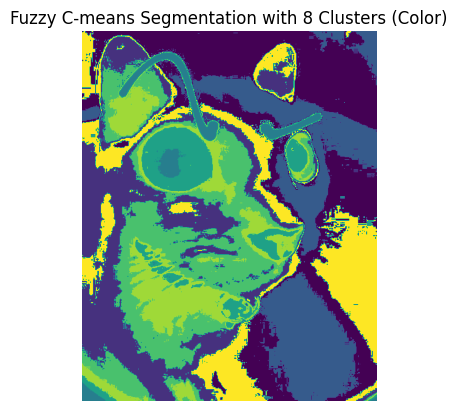

Mr-Cat.jpg segmented with:  8  clusters.

Convergence reached after 41 iterations.


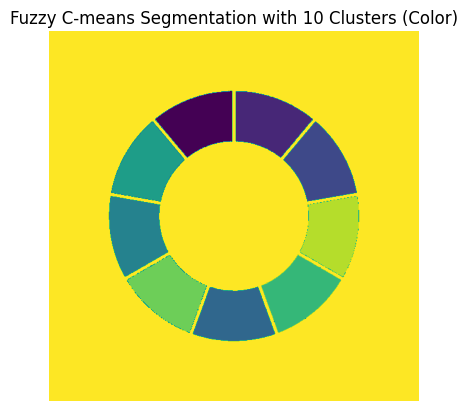

Wheel-of-colors.jpg segmented with:  10  clusters.

Maximum 500 iterations reached.


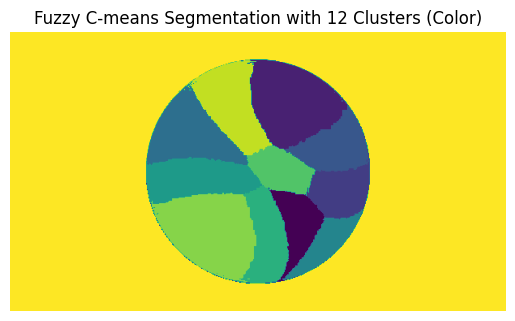

Wheel-of-colors2.jpg segmented with:  12  clusters.


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Download image files
#uploaded = files.upload()

# Initialize the membership matrix
def initialize_membership(n_data, n_clusters):
    return np.random.dirichlet(np.ones(n_clusters), size=n_data)

# Update cluster centers
def update_centers(U, data, m):
    um = U ** m
    centers = np.dot(um.T, data) / np.sum(um, axis=0)[:, np.newaxis]
    return centers

# Update membership matrix
def update_membership(U, centers, data, m, epsilon=1e-10):
    n_data = data.shape[0]
    n_clusters = centers.shape[0]

    # Calculate distances between data points and centers
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)  # Shape (n_data, n_clusters)

    # Calculate membership using vectorized operations
    denominator = (distances[:, :, np.newaxis] / (distances[:, np.newaxis, :] + epsilon)) ** (2 / (m - 1)) # epsilon is added to avoid dividing by zero
    U = 1 / np.sum(denominator, axis=2)  # Invert the sum to calculate membership

    # Normalize membership values
    U = U / U.sum(axis=1, keepdims=True)

    return U

# Fuzzy C-means algorithm
def fuzzy_c_means(data, n_clusters=2, m=2, max_iter=500, error=1e-7):
    n_data = data.shape[0]
    U = initialize_membership(n_data, n_clusters)

    for iteration in range(max_iter):
        centers = update_centers(U, data, m)
        U_new = update_membership(U, centers, data, m)

        if np.linalg.norm(U_new - U) < error:                               # The error value (error parameter) represents the threshold for the change in membership values
            print(f'Convergence reached after {iteration + 1} iterations.') # that triggers the convergence criterion. A smaller error value leads to stricter convergence,
            break                                                           # requiring smaller changes in membership values for the algorithm to stop, which is more precise.
        elif iteration + 1 == max_iter:
              print(f'Maximum {iteration + 1} iterations reached.')
        U = U_new

    return centers, U

# Apply Fuzzy C-means to a grayscale image
def apply_fcm_to_image(image_path, n_clusters=2, m=2):
    img = cv2.imread(image_path, 0)  # Load grayscale image
    if img is None:
        raise ValueError("Image could not be loaded. Check the path.")

    data = img.reshape(-1, 1)

    # Apply FCM
    centers, U = fuzzy_c_means(data, n_clusters, m)

    # Create a segmented image
    segmented_img = np.argmax(U, axis=1).reshape(img.shape)

    # Visualize fuzzy membership
    plt.imshow(segmented_img, cmap='gray')
    plt.title(f'Fuzzy C-means Segmentation with {n_clusters} Clusters')
    plt.axis('off')
    plt.show()

    return n_clusters

# Apply Fuzzy C-means to a color image
def apply_fcm_to_color_image(image_path, n_clusters, m=2):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Image could not be loaded. Check the path.")

    data = img.reshape(-1, 3)

    # Apply FCM
    centers, U = fuzzy_c_means(data, n_clusters, m)

    # Create a segmented image
    segmented_img = np.argmax(U, axis=1).reshape(img.shape[:2])

    # Visualize fuzzy membership
    plt.imshow(segmented_img, cmap='viridis')
    plt.title(f'Fuzzy C-means Segmentation with {n_clusters} Clusters (Color)')
    plt.axis('off')
    plt.show()

    return n_clusters

# Example of usage

print()
print(nvg+' segmented with: ',apply_fcm_to_image(nvg,2),' clusters.')
print()
print(color+' segmented with: ',apply_fcm_to_color_image(color,8), ' clusters.')
print()
print(mcat+' segmented with: ',apply_fcm_to_color_image(mcat,8), ' clusters.')
print()
print(wl+' segmented with: ',apply_fcm_to_color_image(base_folder + wl,10), ' clusters.')
print()
print(wl2+' segmented with: ',apply_fcm_to_color_image(base_folder + wl2,12), ' clusters.')
